# Intelligent Data Analysis - Assignment 3B

# Rachit Aggarwal - M12506500

## Importing libraries

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt  # to plot graphs
import pandas as pd
import numpy as np               # for numerical calculations
from sklearn.utils import shuffle   # to shuffle data
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans  # to import decision tree function
from sklearn.metrics import accuracy_score       # to import accuracy function
from scipy.cluster.vq import vq
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

## Answer 1

## Loading the dataset

In [73]:
BCPdata = pd.read_csv('C:/Users/rachi/Desktop/wpbc.csv')
BCPdata.head()

,ID number,Outcome,Time,radius 1,texture 1,perimeter 1,area 1,smoothness 1,compactness 1,concavity 1,...,perimeter 3,area 3,smoothness 3,compactness 3,concavity 3,concave points 3,symmetry 3,fractal dimension 3,Tumor size,Lymph node status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


## Finding Null values

In [74]:
BCPdata.isnull().sum()

ID number              0
Outcome                0
Time                   0
radius 1               0
texture 1              0
perimeter 1            0
area 1                 0
smoothness 1           0
compactness 1          0
concavity 1            0
concave points 1       0
symmetry 1             0
fractal dimension 1    0
radius 2               0
texture 2              0
perimeter 2            0
area 2                 0
smoothness 2           0
compactness 2          0
concavity 2            0
concave points 2       0
symmetry 2             0
fractal dimension 2    0
radius 3               0
texture 3              0
perimeter 3            0
area 3                 0
smoothness 3           0
compactness 3          0
concavity 3            0
concave points 3       0
symmetry 3             0
fractal dimension 3    0
Tumor size             0
Lymph node status      4
dtype: int64

## Eliminating Null values and replacing them with Mean value

In [75]:
BCPdata['Lymph node status'].fillna(BCPdata['Lymph node status'].mean(), inplace=True)

In [76]:
X = BCPdata.loc[:,'radius 1':'Lymph node status'] # features
y = BCPdata.loc[:,'Outcome'] # target label
X.head()

,radius 1,texture 1,perimeter 1,area 1,smoothness 1,compactness 1,concavity 1,concave points 1,symmetry 1,fractal dimension 1,...,perimeter 3,area 3,smoothness 3,compactness 3,concavity 3,concave points 3,symmetry 3,fractal dimension 3,Tumor size,Lymph node status
0,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


## Answer 1 (a).

## Implementing K-Means with k=4

In [77]:
kmeansclustering = KMeans(n_clusters=4)

## Function to calculate SSE value for each cluster

In [78]:
def SSEcalc(X,centroids): 
    for i in range(4):
        error = X - centroids[i]
        squareddist = error * error
        sumsquareddist = np.sum(squareddist, axis=1)
        SSE_value = np.sum(sumsquareddist, axis=0)
        print("SSE value for cluster"+str(i)+": "+str(SSE_value))

### To get different centroids for every run a parameter is passed to KMeans function called 'init', and 'random' is provided as its value. For each run the algorithm uses different initial centroids.

## 1st Run

In [79]:
kmeansclustering1 = KMeans(n_clusters=4, init='random')
fitdata1 = kmeansclustering1.fit(X,y)
fitdata1

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Cluster Centers

In [80]:
centroids1 = fitdata1.cluster_centers_
centroids1

array([[1.81627027e+01, 2.21758108e+01, 1.19550000e+02, 1.02721216e+03,
        1.00387027e-01, 1.36381892e-01, 1.53067973e-01, 8.94772973e-02,
        1.91543243e-01, 6.07670270e-02, 6.42751351e-01, 1.31675811e+00,
        4.49112162e+00, 7.34322973e+01, 6.70147297e-03, 3.03457973e-02,
        4.11832432e-02, 1.58716622e-02, 2.10804459e-02, 3.95472973e-03,
        2.16770270e+01, 2.96383784e+01, 1.43975676e+02, 1.43620270e+03,
        1.38626081e-01, 3.30700000e-01, 4.12705541e-01, 1.76687838e-01,
        3.12337838e-01, 8.51547297e-02, 3.18108108e+00, 3.30300919e+00],
       [2.39600000e+01, 2.39975000e+01, 1.58900000e+02, 1.80125000e+03,
        1.03157500e-01, 1.66575000e-01, 2.37212500e-01, 1.42982500e-01,
        1.86400000e-01, 6.01212500e-02, 1.15680000e+00, 1.16347500e+00,
        7.88112500e+00, 1.86375000e+02, 5.25912500e-03, 2.72100000e-02,
        3.77612500e-02, 1.44637500e-02, 1.67225000e-02, 3.40962500e-03,
        3.18425000e+01, 3.21900000e+01, 2.13112500e+02, 3.12087

## Overall SSE value of the run

In [81]:
fitdata1.inertia_

11997444.818187347

## SSE value for each cluster

In [82]:
SSEcalc(X,centroids1)

SSE value for cluster0: 93662092.01213028
SSE value for cluster1: 816736778.5355047
SSE value for cluster2: 168056017.13290146
SSE value for cluster3: 205393092.4694925


## 2nd Run

In [83]:
kmeansclustering2 = KMeans(n_clusters=4, init='random')
fitdata2 = kmeansclustering2.fit(X,y)
fitdata2

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Cluster Centers

In [84]:
centroids2 = fitdata2.cluster_centers_
centroids2

array([[1.74450000e+01, 2.25537500e+01, 1.14557143e+02, 9.45553571e+02,
        1.00006964e-01, 1.29811607e-01, 1.38241250e-01, 8.11496429e-02,
        1.88687500e-01, 6.04766071e-02, 5.76582143e-01, 1.32268929e+00,
        3.99842857e+00, 6.29812500e+01, 6.92416071e-03, 2.82919286e-02,
        3.85589286e-02, 1.52348571e-02, 1.94211250e-02, 3.87741071e-03,
        2.06908929e+01, 3.01530357e+01, 1.36744643e+02, 1.30900000e+03,
        1.38470179e-01, 3.08166071e-01, 3.82710893e-01, 1.66227143e-01,
        3.09000000e-01, 8.35062500e-02, 2.99642857e+00, 2.28948822e+00],
       [2.30740000e+01, 2.48473333e+01, 1.53293333e+02, 1.67160000e+03,
        9.99053333e-02, 1.65033333e-01, 2.18660000e-01, 1.28218000e-01,
        1.84140000e-01, 5.97033333e-02, 1.06470000e+00, 1.21493333e+00,
        7.39900000e+00, 1.61461333e+02, 5.48393333e-03, 2.84173333e-02,
        3.95140000e-02, 1.47046667e-02, 1.78100000e-02, 3.34360000e-03,
        3.01513333e+01, 3.30000000e+01, 2.02273333e+02, 2.79433

## Overall SSE value of the run

In [85]:
fitdata2.inertia_

12251322.614135144

## SSE value for each cluster

In [86]:
SSEcalc(X,centroids2)

SSE value for cluster0: 94767482.64291255
SSE value for cluster1: 575204496.3365426
SSE value for cluster2: 175392886.71309906
SSE value for cluster3: 141785475.96624592


## 3rd Run

In [87]:
kmeansclustering3 = KMeans(n_clusters=4, init="random")
fitdata3 = kmeansclustering3.fit(X,y)
fitdata3

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Cluster Centers

In [88]:
centroids3 = fitdata3.cluster_centers_
centroids3

array([[1.80736111e+01, 2.21644444e+01, 1.18891667e+02, 1.01715972e+03,
        1.00192778e-01, 1.35127222e-01, 1.49740694e-01, 8.78423611e-02,
        1.91263889e-01, 6.05190278e-02, 6.35109722e-01, 1.31407222e+00,
        4.42997222e+00, 7.22666667e+01, 6.69909722e-03, 3.00197083e-02,
        4.05502778e-02, 1.58253333e-02, 2.09968472e-02, 3.91911111e-03,
        2.15563889e+01, 2.96759722e+01, 1.43134722e+02, 1.42073611e+03,
        1.38678194e-01, 3.29336111e-01, 4.08220972e-01, 1.75341667e-01,
        3.11904167e-01, 8.47906944e-02, 3.07500000e+00, 3.11698167e+00],
       [2.35850000e+01, 2.48890000e+01, 1.56520000e+02, 1.75190000e+03,
        1.03524000e-01, 1.62960000e-01, 2.30530000e-01, 1.38238000e-01,
        1.84800000e-01, 5.97150000e-02, 1.17651000e+00, 1.31428000e+00,
        8.06320000e+00, 1.83879000e+02, 5.52620000e-03, 2.64240000e-02,
        3.79100000e-02, 1.48410000e-02, 1.76760000e-02, 3.31620000e-03,
        3.12300000e+01, 3.34770000e+01, 2.09070000e+02, 3.00630

## Overall SSE value of the run

In [89]:
fitdata3.inertia_

11968862.763121244

## SSE value for each cluster

In [90]:
SSEcalc(X,centroids3)

SSE value for cluster0: 93307024.09016782
SSE value for cluster1: 725452059.3558494
SSE value for cluster2: 169122116.37532523
SSE value for cluster3: 189457072.95746604


## Answer 1 (b).

## The SSE values for 3 runs are:
### Run 1: 11997444.818187347
### Run 2: 12251322.614135144
### Run 3: 11968862.763121244

## The best model has the lowest error value. Observing the Sum of Squared Errors (SSE) values of clustering for all the 3 runs, it can be identified that the error is lowest in Run 3. So we will choose Model 3 as the best model. 

## Answer 1(c).

## Getting the cluster labels

In [91]:
cluster_labels = kmeansclustering3.fit_predict(X)

## Silhouette coefficient for clustering

In [92]:
silhouette_avg = silhouette_score(X, cluster_labels)
silhouette_avg

0.4999156642972316

## Silhouette coefficient for each sample

In [93]:
sample_silhouette_values = silhouette_samples(X, cluster_labels)
sample_silhouette_values

array([ 0.68648186,  0.36518177,  0.61090141,  0.60517673,  0.14308046,
        0.71007188,  0.40993528,  0.72270666,  0.71891607,  0.69119726,
        0.04893303,  0.35921631,  0.62412181,  0.69562441,  0.32104198,
        0.41832026,  0.63447113,  0.06368806,  0.3489863 ,  0.64831432,
        0.7255961 ,  0.65631525,  0.18791103,  0.49028136,  0.65825146,
        0.59894412,  0.32641894,  0.33177001,  0.38003793,  0.74048516,
        0.65564758,  0.72802876,  0.7403278 ,  0.57932317,  0.25315392,
        0.70784963,  0.72208731,  0.49789007,  0.72854251,  0.55525599,
        0.54530049,  0.65439373,  0.68094712,  0.69484064,  0.70643258,
        0.33628528,  0.74560891,  0.20787473,  0.61258739,  0.56851382,
        0.49397994,  0.7408492 ,  0.72325303,  0.72900386,  0.43856292,
        0.31075212,  0.5682998 ,  0.52604097,  0.41650628,  0.48590925,
        0.30393265,  0.07080593,  0.59828774,  0.6774358 ,  0.63539895,
        0.28146984,  0.62934753,  0.61095396,  0.39411425,  0.56

## Silhouette Coefficient for each cluster

In [94]:
n_clusters = 4
avgclussilh = []
for i in range(n_clusters):
    cluster_samples = sample_silhouette_values[cluster_labels == i]
    avg_cluster_silhouette = np.sum(cluster_samples, axis=0)/len(cluster_samples)
    avgclussilh.append(avg_cluster_silhouette)
    print("Silhoutte Coefficient for cluster "+str(i)+" = "+str(avg_cluster_silhouette))

Silhoutte Coefficient for cluster 0 = 0.4193113319688232
Silhoutte Coefficient for cluster 1 = 0.350575304317243
Silhoutte Coefficient for cluster 2 = 0.44966534779751677
Silhoutte Coefficient for cluster 3 = 0.6112978187738719


## Plotting the clustering

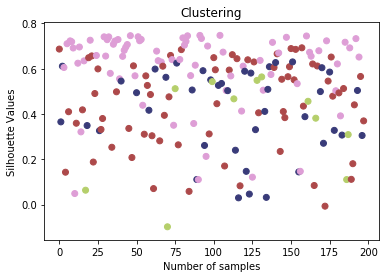

In [95]:
plt.scatter(range(len(X)), sample_silhouette_values, c=cluster_labels, cmap="tab20b")
plt.title("Clustering")
plt.xlabel("Number of samples")
plt.ylabel("Silhouette Values")
plt.legend()
plt.figsize = (90, 50)
plt.show()

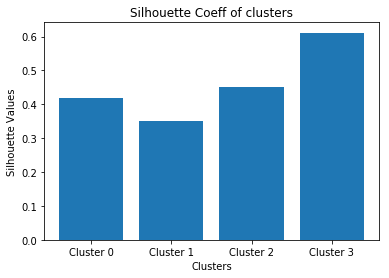

In [96]:
xaxis = np.arange(4)
plt.bar(xaxis,avgclussilh)
plt.xticks(xaxis, ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.figsize = (30,20)
plt.xlabel("Clusters")
plt.ylabel("Silhouette Values")
plt.title("Silhouette Coeff of clusters")
plt.show()

## Answer 1(d).

## Majority class for each class and fraction of points

In [97]:
n_clusters = 4
for i in range(n_clusters):
    class_label = (y[cluster_labels == i]).value_counts().idxmax()
    majority = (y[cluster_labels == i]).value_counts().max()
    print("Cluster "+ str(i) + "\n" + "Majority Class: " + str(class_label) + "\nFraction of Points: "+ str(majority)+ "\n")

Cluster 0
Majority Class: N
Fraction of Points: 29

Cluster 1
Majority Class: N
Fraction of Points: 6

Cluster 2
Majority Class: N
Fraction of Points: 52

Cluster 3
Majority Class: N
Fraction of Points: 64



## Clustering information - Majority class, fraction of point, centroid and SSE value

In [98]:
def cluster_info(X,centroids): 
    SSE_value_list = []
    class_labels_list = []
    for i in range(4):
        error = X - centroids[i]
        squareddist = error * error
        sumsquareddist = np.sum(squareddist, axis=1)
        SSE_value = np.sum(sumsquareddist, axis=0)
        SSE_value_list.append(SSE_value)
        class_label = (y[cluster_labels == i]).value_counts().idxmax()
        class_labels_list.append(class_label)
        majority = (y[cluster_labels == i]).value_counts().max()
        print("Cluster "+ str(i) + "\n" + "Majority Class: " + str(class_label) + "\nFraction of Points: "+ str(majority)+ "\n"
             + "Centroid: " + str(centroids[i]) + "\n SSE value: " + str(SSE_value_list[i])+"\n" )
    return class_labels_list

In [99]:
class_labels_list = cluster_info(X,centroids3)

Cluster 0
Majority Class: N
Fraction of Points: 29
Centroid: [1.80736111e+01 2.21644444e+01 1.18891667e+02 1.01715972e+03
 1.00192778e-01 1.35127222e-01 1.49740694e-01 8.78423611e-02
 1.91263889e-01 6.05190278e-02 6.35109722e-01 1.31407222e+00
 4.42997222e+00 7.22666667e+01 6.69909722e-03 3.00197083e-02
 4.05502778e-02 1.58253333e-02 2.09968472e-02 3.91911111e-03
 2.15563889e+01 2.96759722e+01 1.43134722e+02 1.42073611e+03
 1.38678194e-01 3.29336111e-01 4.08220972e-01 1.75341667e-01
 3.11904167e-01 8.47906944e-02 3.07500000e+00 3.11698167e+00]
 SSE value: 93307024.09016782

Cluster 1
Majority Class: N
Fraction of Points: 6
Centroid: [2.35850e+01 2.48890e+01 1.56520e+02 1.75190e+03 1.03524e-01 1.62960e-01
 2.30530e-01 1.38238e-01 1.84800e-01 5.97150e-02 1.17651e+00 1.31428e+00
 8.06320e+00 1.83879e+02 5.52620e-03 2.64240e-02 3.79100e-02 1.48410e-02
 1.76760e-02 3.31620e-03 3.12300e+01 3.34770e+01 2.09070e+02 3.00630e+03
 1.39790e-01 3.47060e-01 4.73810e-01 2.25960e-01 2.89280e-01 8.1919

## Answer 1(e).

## Creating test set

In [100]:
x_test = np.array(X)

## Predicting labels for testing data

In [116]:
li2 = []
for i in range(len(x_test)):
    li =[]
    for j in range(len(centroids3)):
        dist = centroids3[j] - x_test[i]
        dist = dist**2
        sumdist = np.sum(dist)
        li.append(sumdist)
    index = li.index(min(li))
    li2.append(index)
    
Pred_label=[]
for k in range(len(x_test)):
    cluster_assigned = li2[k]
    Pred_label.append(class_labels_list[cluster_assigned])
    Pred_label  

## Making Confusion Matrix

In [114]:
labels = ['N', 'R']
confmat = confusion_matrix(y, Pred_label, labels)

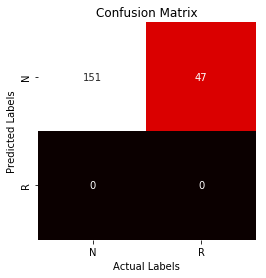

In [115]:
sns.heatmap(confmat.T, square=True, annot=True, cbar=False,
                    xticklabels=['N','R'], yticklabels=['N', 'R'], cmap='hot' , fmt='g')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels');
plt.title('Confusion Matrix')
plt.show()

## Computing Accuracy, Precision and Recall

In [112]:
report = precision_recall_fscore_support(y, Pred_label)
accuracy = accuracy_score(y, Pred_label)

print('Class N:\n')
print('\nPrecision: ' + str(report[0][0]))
print('\nRecall: ' + str(report[1][0]))

print('\nClass R:\n')
print('\nPrecision: ' + str(report[0][1]))
print('\nRecall: ' + str(report[1][1]))

print('\nAccuracy: ' + str(accuracy))

Class N:


Precision: 0.7626262626262627

Recall: 1.0

Class R:


Precision: 0.0

Recall: 0.0

Accuracy: 0.7626262626262627


C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Answer 1(f).

### Comparing the values of obtained KMeans model and Decision Tree model built in HW3 Q1.
### KMeans:-
#### Precision class N:0.7626262626262627
#### Precision class R:0.0
#### Recall class N:1.0
#### Recall class R:0.0
#### Accuracy:0.7626262626262627
### Decision Tree:-
#### Precision class N:0.81
#### Precision class R:0.58 
#### Recall class N:0.93
#### Recall class R:0.32
#### Accuracy: 0.7627083333333334

### We can analyze that the accuracy for both the model is same = 0.762
### Value of precision for class N is more for Decision Tree and less for KMeans. And, for class R Decision Tree has more precision as compared to the 0 precision obtained by the KMeans algorithm
### Recall value for class N is perfect in case of KMeans which is more than for class N recall of decision tree. But class R Decision tree has more recall value than recall value of class R in KMeans model.
### Since in KMeans clustering all the clusters have N class so it assigns class N to all the elements but that is not the case in decision tree classifier. 

## Answer2

## White Wine Quality dataset

In [4]:
WWQdata = pd.read_csv('C:/Users/rachi/Desktop/WWQ.csv')
WWQdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Red Wine Quality dataset

In [5]:
RWQdata = pd.read_csv('C:/Users/rachi/Desktop/RWQ.csv')
RWQdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Combining Datasets

In [379]:
wine_data = pd.concat([RWQdata, WWQdata], axis=0)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Minimum SSE value of the 3 iterations for different values of K 

In [392]:
klist = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
X = wine_data.loc[:,'fixed acidity':'alcohol'] # features
y = wine_data.loc[:,'quality'] # target label
SSE_value_list = []
min_SSE_list= []
for i in klist:
    print("For K = " + str(i) + ":\n")
    for j in range(3):
        kmeansclustering = KMeans(n_clusters=i, init='random')
        fitdata = kmeansclustering.fit(X,y)
        SSE = fitdata.inertia_
        SSE_value_list.append(SSE)
        min_SSE = min(SSE_value_list)
    min_SSE_list.append(min_SSE)
    print("Minimum SSE value: "+ str(min_SSE) + "\n")    

For K = 3:

Minimum SSE value: 4331571.931038661

For K = 4:

Minimum SSE value: 3038842.109675485

For K = 5:

Minimum SSE value: 2394022.4463956873

For K = 6:

Minimum SSE value: 2041626.7910441724

For K = 7:

Minimum SSE value: 1796410.8358946398

For K = 8:

Minimum SSE value: 1623816.394384534

For K = 9:

Minimum SSE value: 1482594.95124864

For K = 10:

Minimum SSE value: 1368109.876103647

For K = 11:

Minimum SSE value: 1268469.0196393544

For K = 12:

Minimum SSE value: 1180018.2369858285

For K = 13:

Minimum SSE value: 1080947.714167035

For K = 14:

Minimum SSE value: 1026858.857341212



## Plotting SSE values vs. K values

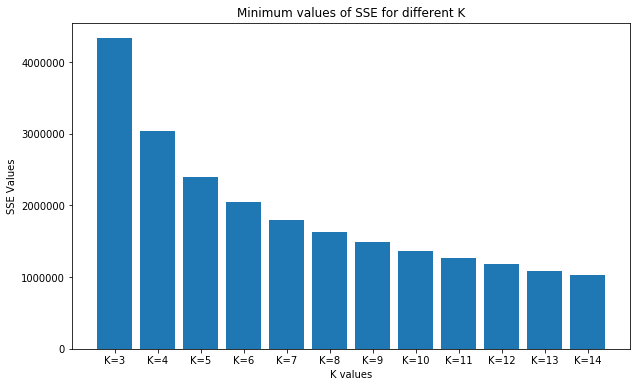

In [409]:
xaxis = np.arange(12)
plt.figure(figsize = (10,6))
plt.bar(xaxis,min_SSE_list)
plt.xticks(xaxis, ['K=3', 'K=4', 'K=5', 'K=6', 'K=7', 'K=8', 'K=9', 'K=10', 'K=11', 'K=12', 'K=13', 'K=14'])
plt.xlabel("K values")
plt.ylabel("SSE Values")
plt.title("Minimum values of SSE for different K")
plt.show()

## Analysis

## After plotting minimum SSE values against the different K values, we can deduce that as the number of K increases the error decreases. If we keep increasing the number of clusters in the data space, number of centroids increases parallely during the learning phase. With more centroids the distance from each points can be more efficiently measured, thus probabilty of errors decreases.